In [7]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install thinkx --user

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 51kB 795kB/s ta 0:00:01
  Running setup.py bdist_wheel for thinkx ... done
  Stored in directory: /home/mpc6/.cache/pip/wheels/74/e9/57/f4ad676ba30144b574a6cc36606e82874f8aac8271112f1cd3
Successfully built thinkx
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import os
import soundfile as sf
#import sounddevice as sd
import librosa
import numpy as np
import glob
import matplotlib.pyplot as plt
from IPython.display import Audio
import thinkdsp

In [17]:
""" clips area before and after number is spoken
arg are the directory where wave files are located

Author: Merlin Carson
Date: 6/11/2019
"""
import os


# final sample rate for wave files
SAMPLERATE = 8000

def get_averages(samples, frameSize):
    averages = []
    for frame in range(0,len(samples), frameSize):
        averages.append(np.average(np.absolute(samples[frame:frame+frameSize])))

    return averages

def find_clusters(samples, averages, target, frameSize):
    startIdx = None
    endIdx = None
    clusters = []
    for idx, frame in enumerate(range(0,len(samples), frameSize)):
        if averages[idx] > target and not startIdx:
            startIdx = idx
        if startIdx and not endIdx:
            if averages[idx] < target:
                endIdx = idx
        if startIdx and endIdx:
            clusters.append((startIdx,endIdx))
            startIdx = None
            endIdx = None

    return clusters

def find_longest_cluster(clusters):
    longestCluster = 0
    longestClusterSize = 0
    for cluster in clusters:
        clusterSize = cluster[1]-cluster[0]
        if clusterSize > longestClusterSize:
            longestClusterSize = clusterSize
            longestCluster = cluster

    return longestCluster

def clip_audio(samples):

    frameSize = 100
    averages = get_averages(samples, frameSize)
    target = np.average(averages)/2     # threshold, assume below this level is backround noise

    # find all audio clusters above target threshold
    clusters = find_clusters(samples, averages, target, frameSize)

    # find longest audio cluster
    longestCluster = find_longest_cluster(clusters)

    return samples[longestCluster[0]*frameSize:longestCluster[1]*frameSize+frameSize]

def clip_waves(rawAudioPath, clippedAudioPath):
    for fileName in glob.iglob(os.path.join(rawAudioPath, '*.wav')):
        print('File:', fileName)
        samples, sample_rate = sf.read(fileName )
        print("number of samples:", len(samples))

        # find largest cluster of audio and grab the samples
        clippedSamples = clip_audio(samples)

        # write clipped audio to file
        clippedFileName = os.path.join(clippedAudioPath, os.path.basename(fileName))
        sf.write(clippedFileName, clippedSamples, SAMPLERATE, subtype='PCM_16')
        print(fileName,' clipped and saved as ',clippedFileName)

def filter_audio(clippedAudioPath):
    for fileName in glob.iglob(os.path.join(clippedAudioPath, '*.wav')):
        print('File:', fileName)
        sample = thinkdsp.read_wave(fileName)
        spectrum = sample.make_spectrum()
        spectrum.low_pass(cutoff=3400, factor=0.01)
        spectrum.high_pass(cutoff=300, factor=0.01)
        wave = spectrum.make_wave()
        wave.play(fileName)
        print(fileName,' filtered and saved as ', fileName)



In [ ]:
    assert len(sys.argv) > 2, "Must include path to audio files and path for clipped audio files as arguments."

    rawAudioPath = 'data/numbers'      # location of waves to clip
    clippedAudioPath = 'data/filteredNumbers'      # location to save clipped audio files

    # if output directory does not exist, create it
    if not os.path.isdir(clippedAudioPath):
        os.makedirs(clippedAudioPath)

    print('Location of raw wave files: ',rawAudioPath)
    print('Location to save clipped wave files: ', clippedAudioPath)

    clip_waves(rawAudioPath, clippedAudioPath)

    filter_audio(clippedAudioPath)

    print('Audio Clipping and filtering complete.')

Location of raw wave files:  data/numbers
Location to save clipped wave files:  data/filteredNumbers
File: data/numbers/00_00c1b12173.wav
number of samples: 15702
data/numbers/00_00c1b12173.wav  clipped and saved as  data/filteredNumbers/00_00c1b12173.wav
File: data/numbers/00_064009241a.wav
number of samples: 12404
data/numbers/00_064009241a.wav  clipped and saved as  data/filteredNumbers/00_064009241a.wav
File: data/numbers/00_0666098465.wav
number of samples: 16326
data/numbers/00_0666098465.wav  clipped and saved as  data/filteredNumbers/00_0666098465.wav
File: data/numbers/00_07c3627a21.wav
number of samples: 15702
data/numbers/00_07c3627a21.wav  clipped and saved as  data/filteredNumbers/00_07c3627a21.wav
File: data/numbers/00_0a3c709caa.wav
number of samples: 16347
data/numbers/00_0a3c709caa.wav  clipped and saved as  data/filteredNumbers/00_0a3c709caa.wav
File: data/numbers/00_0c447806b3.wav
number of samples: 15702
data/numbers/00_0c447806b3.wav  clipped and saved as  data/fil

number of samples: 15604
data/numbers/01_313c866a41.wav  clipped and saved as  data/filteredNumbers/01_313c866a41.wav
File: data/numbers/01_33b86a60b6.wav
number of samples: 8322
data/numbers/01_33b86a60b6.wav  clipped and saved as  data/filteredNumbers/01_33b86a60b6.wav
File: data/numbers/01_34a137cb3b.wav
number of samples: 16384
data/numbers/01_34a137cb3b.wav  clipped and saved as  data/filteredNumbers/01_34a137cb3b.wav
File: data/numbers/01_3aaba53bca.wav
number of samples: 8322
data/numbers/01_3aaba53bca.wav  clipped and saved as  data/filteredNumbers/01_3aaba53bca.wav
File: data/numbers/01_3c07b04051.wav
number of samples: 15702
data/numbers/01_3c07b04051.wav  clipped and saved as  data/filteredNumbers/01_3c07b04051.wav
File: data/numbers/01_4208164405.wav
number of samples: 16347
data/numbers/01_4208164405.wav  clipped and saved as  data/filteredNumbers/01_4208164405.wav
File: data/numbers/01_422aa56701.wav
number of samples: 15604
data/numbers/01_422aa56701.wav  clipped and sav

number of samples: 16347
data/numbers/02_618aa0c92a.wav  clipped and saved as  data/filteredNumbers/02_618aa0c92a.wav
File: data/numbers/02_70635a496b.wav
number of samples: 15604
data/numbers/02_70635a496b.wav  clipped and saved as  data/filteredNumbers/02_70635a496b.wav
File: data/numbers/02_71bcb995c5.wav
number of samples: 15604
data/numbers/02_71bcb995c5.wav  clipped and saved as  data/filteredNumbers/02_71bcb995c5.wav
File: data/numbers/02_725aba6401.wav
number of samples: 15604
data/numbers/02_725aba6401.wav  clipped and saved as  data/filteredNumbers/02_725aba6401.wav
File: data/numbers/02_73b025ba7a.wav
number of samples: 16326
data/numbers/02_73b025ba7a.wav  clipped and saved as  data/filteredNumbers/02_73b025ba7a.wav
File: data/numbers/02_76184a9723.wav
number of samples: 16384
data/numbers/02_76184a9723.wav  clipped and saved as  data/filteredNumbers/02_76184a9723.wav
File: data/numbers/02_7656758289.wav
number of samples: 16347
data/numbers/02_7656758289.wav  clipped and s

number of samples: 12404
data/numbers/03_a4374b99c8.wav  clipped and saved as  data/filteredNumbers/03_a4374b99c8.wav
File: data/numbers/03_b478bb5901.wav
number of samples: 15604
data/numbers/03_b478bb5901.wav  clipped and saved as  data/filteredNumbers/03_b478bb5901.wav
File: data/numbers/03_b595971b43.wav
number of samples: 16347
data/numbers/03_b595971b43.wav  clipped and saved as  data/filteredNumbers/03_b595971b43.wav
File: data/numbers/03_b7bb54954b.wav
number of samples: 16326
data/numbers/03_b7bb54954b.wav  clipped and saved as  data/filteredNumbers/03_b7bb54954b.wav
File: data/numbers/03_b85aab2a5b.wav
number of samples: 16347
data/numbers/03_b85aab2a5b.wav  clipped and saved as  data/filteredNumbers/03_b85aab2a5b.wav
File: data/numbers/03_b99cb60a60.wav
number of samples: 15604
data/numbers/03_b99cb60a60.wav  clipped and saved as  data/filteredNumbers/03_b99cb60a60.wav
File: data/numbers/03_bc2b8bc376.wav
number of samples: 15702
data/numbers/03_bc2b8bc376.wav  clipped and s

data/numbers/05_4357367120.wav  clipped and saved as  data/filteredNumbers/05_4357367120.wav
File: data/numbers/05_46bb9bb406.wav
number of samples: 16384
data/numbers/05_46bb9bb406.wav  clipped and saved as  data/filteredNumbers/05_46bb9bb406.wav
File: data/numbers/05_4955907707.wav
number of samples: 12404
data/numbers/05_4955907707.wav  clipped and saved as  data/filteredNumbers/05_4955907707.wav
File: data/numbers/05_4c2486c280.wav
number of samples: 15702
data/numbers/05_4c2486c280.wav  clipped and saved as  data/filteredNumbers/05_4c2486c280.wav
File: data/numbers/05_5148c81829.wav
number of samples: 16422
data/numbers/05_5148c81829.wav  clipped and saved as  data/filteredNumbers/05_5148c81829.wav
File: data/numbers/05_528b06bb04.wav
number of samples: 15604
data/numbers/05_528b06bb04.wav  clipped and saved as  data/filteredNumbers/05_528b06bb04.wav
File: data/numbers/05_548bc34833.wav
number of samples: 16347
data/numbers/05_548bc34833.wav  clipped and saved as  data/filteredNum

data/numbers/06_5c186482c8.wav  clipped and saved as  data/filteredNumbers/06_5c186482c8.wav
File: data/numbers/06_60439c4487.wav
number of samples: 15702
data/numbers/06_60439c4487.wav  clipped and saved as  data/filteredNumbers/06_60439c4487.wav
File: data/numbers/06_62a67a4b33.wav
number of samples: 15702
data/numbers/06_62a67a4b33.wav  clipped and saved as  data/filteredNumbers/06_62a67a4b33.wav
File: data/numbers/06_66b48c0312.wav
number of samples: 8386
data/numbers/06_66b48c0312.wav  clipped and saved as  data/filteredNumbers/06_66b48c0312.wav
File: data/numbers/06_69a708c325.wav
number of samples: 16347
data/numbers/06_69a708c325.wav  clipped and saved as  data/filteredNumbers/06_69a708c325.wav
File: data/numbers/06_6c8a619517.wav
number of samples: 8322
data/numbers/06_6c8a619517.wav  clipped and saved as  data/filteredNumbers/06_6c8a619517.wav
File: data/numbers/06_745053502b.wav
number of samples: 15604
data/numbers/06_745053502b.wav  clipped and saved as  data/filteredNumbe

data/numbers/07_b0c79c87c0.wav  clipped and saved as  data/filteredNumbers/07_b0c79c87c0.wav
File: data/numbers/07_b542797993.wav
number of samples: 16384
data/numbers/07_b542797993.wav  clipped and saved as  data/filteredNumbers/07_b542797993.wav
File: data/numbers/07_b7b8133135.wav
number of samples: 16326
data/numbers/07_b7b8133135.wav  clipped and saved as  data/filteredNumbers/07_b7b8133135.wav
File: data/numbers/07_b8785aa91c.wav
number of samples: 15604
data/numbers/07_b8785aa91c.wav  clipped and saved as  data/filteredNumbers/07_b8785aa91c.wav
File: data/numbers/07_bc85a22144.wav
number of samples: 16347
data/numbers/07_bc85a22144.wav  clipped and saved as  data/filteredNumbers/07_bc85a22144.wav
File: data/numbers/07_c179476c60.wav
number of samples: 16384
data/numbers/07_c179476c60.wav  clipped and saved as  data/filteredNumbers/07_c179476c60.wav
File: data/numbers/07_c5830b4616.wav
number of samples: 16347
data/numbers/07_c5830b4616.wav  clipped and saved as  data/filteredNum

data/numbers/09_2b167aa714.wav  clipped and saved as  data/filteredNumbers/09_2b167aa714.wav
File: data/numbers/09_303914842c.wav
number of samples: 15702
data/numbers/09_303914842c.wav  clipped and saved as  data/filteredNumbers/09_303914842c.wav
File: data/numbers/09_3459b66216.wav
number of samples: 12404
data/numbers/09_3459b66216.wav  clipped and saved as  data/filteredNumbers/09_3459b66216.wav
File: data/numbers/09_367bb172cc.wav
number of samples: 16384
data/numbers/09_367bb172cc.wav  clipped and saved as  data/filteredNumbers/09_367bb172cc.wav
File: data/numbers/09_3c50b707b4.wav
number of samples: 15604
data/numbers/09_3c50b707b4.wav  clipped and saved as  data/filteredNumbers/09_3c50b707b4.wav
File: data/numbers/09_3c7c459214.wav
number of samples: 8386
data/numbers/09_3c7c459214.wav  clipped and saved as  data/filteredNumbers/09_3c7c459214.wav
File: data/numbers/09_47668486b8.wav
number of samples: 15702
data/numbers/09_47668486b8.wav  clipped and saved as  data/filteredNumb

File: data/numbers/10_65b9435578.wav
number of samples: 16326
data/numbers/10_65b9435578.wav  clipped and saved as  data/filteredNumbers/10_65b9435578.wav
File: data/numbers/10_709a065b95.wav
number of samples: 15702
data/numbers/10_709a065b95.wav  clipped and saved as  data/filteredNumbers/10_709a065b95.wav
File: data/numbers/10_7463cb07c3.wav
number of samples: 15702
data/numbers/10_7463cb07c3.wav  clipped and saved as  data/filteredNumbers/10_7463cb07c3.wav
File: data/numbers/10_799b4c9811.wav
number of samples: 15604
data/numbers/10_799b4c9811.wav  clipped and saved as  data/filteredNumbers/10_799b4c9811.wav
File: data/numbers/10_80c6219452.wav
number of samples: 15604
data/numbers/10_80c6219452.wav  clipped and saved as  data/filteredNumbers/10_80c6219452.wav
File: data/numbers/10_8167c370c6.wav
number of samples: 16384
data/numbers/10_8167c370c6.wav  clipped and saved as  data/filteredNumbers/10_8167c370c6.wav
File: data/numbers/10_8339c94575.wav
number of samples: 16326
data/num

data/numbers/11_c853bb5202.wav  clipped and saved as  data/filteredNumbers/11_c853bb5202.wav
File: data/numbers/12_0182a1562b.wav
number of samples: 16347
data/numbers/12_0182a1562b.wav  clipped and saved as  data/filteredNumbers/12_0182a1562b.wav
File: data/numbers/12_03a4a11a86.wav
number of samples: 16347
data/numbers/12_03a4a11a86.wav  clipped and saved as  data/filteredNumbers/12_03a4a11a86.wav
File: data/numbers/12_06cc6471c1.wav
number of samples: 16347
data/numbers/12_06cc6471c1.wav  clipped and saved as  data/filteredNumbers/12_06cc6471c1.wav
File: data/numbers/12_0c8c51731a.wav
number of samples: 15702
data/numbers/12_0c8c51731a.wav  clipped and saved as  data/filteredNumbers/12_0c8c51731a.wav
File: data/numbers/12_1aba388ba0.wav
number of samples: 16384
data/numbers/12_1aba388ba0.wav  clipped and saved as  data/filteredNumbers/12_1aba388ba0.wav
File: data/numbers/12_20a8192401.wav
number of samples: 16347
data/numbers/12_20a8192401.wav  clipped and saved as  data/filteredNum

/home/mpc6/.local/lib/python3.5/site-packages/thinkdsp.py:1115: UserWarning: Warning: normalizing before quantizing.
  warnings.warn('Warning: normalizing before quantizing.')


data/filteredNumbers/00_0666098465.wav  filtered and saved as  data/filteredNumbers/00_0666098465.wav
File: data/filteredNumbers/00_07c3627a21.wav
Writing data/filteredNumbers/00_07c3627a21.wav
data/filteredNumbers/00_07c3627a21.wav  filtered and saved as  data/filteredNumbers/00_07c3627a21.wav
File: data/filteredNumbers/00_0a3c709caa.wav
Writing data/filteredNumbers/00_0a3c709caa.wav
data/filteredNumbers/00_0a3c709caa.wav  filtered and saved as  data/filteredNumbers/00_0a3c709caa.wav
File: data/filteredNumbers/00_0c447806b3.wav
Writing data/filteredNumbers/00_0c447806b3.wav
data/filteredNumbers/00_0c447806b3.wav  filtered and saved as  data/filteredNumbers/00_0c447806b3.wav
File: data/filteredNumbers/00_0c68680041.wav
Writing data/filteredNumbers/00_0c68680041.wav
data/filteredNumbers/00_0c68680041.wav  filtered and saved as  data/filteredNumbers/00_0c68680041.wav
File: data/filteredNumbers/00_139360572a.wav
Writing data/filteredNumbers/00_139360572a.wav
data/filteredNumbers/00_139360

data/filteredNumbers/00_ac56b69026.wav  filtered and saved as  data/filteredNumbers/00_ac56b69026.wav
File: data/filteredNumbers/00_b390719b50.wav
Writing data/filteredNumbers/00_b390719b50.wav
data/filteredNumbers/00_b390719b50.wav  filtered and saved as  data/filteredNumbers/00_b390719b50.wav
File: data/filteredNumbers/00_b6c8baa163.wav
Writing data/filteredNumbers/00_b6c8baa163.wav
data/filteredNumbers/00_b6c8baa163.wav  filtered and saved as  data/filteredNumbers/00_b6c8baa163.wav
File: data/filteredNumbers/00_b7191879c8.wav
Writing data/filteredNumbers/00_b7191879c8.wav
data/filteredNumbers/00_b7191879c8.wav  filtered and saved as  data/filteredNumbers/00_b7191879c8.wav
File: data/filteredNumbers/00_b7608b5131.wav
Writing data/filteredNumbers/00_b7608b5131.wav
data/filteredNumbers/00_b7608b5131.wav  filtered and saved as  data/filteredNumbers/00_b7608b5131.wav
File: data/filteredNumbers/00_b862b57c44.wav
Writing data/filteredNumbers/00_b862b57c44.wav
data/filteredNumbers/00_b862b5

data/filteredNumbers/01_7880210b87.wav  filtered and saved as  data/filteredNumbers/01_7880210b87.wav
File: data/filteredNumbers/01_79b31b3947.wav
Writing data/filteredNumbers/01_79b31b3947.wav
data/filteredNumbers/01_79b31b3947.wav  filtered and saved as  data/filteredNumbers/01_79b31b3947.wav
File: data/filteredNumbers/01_84ab37c6b0.wav
Writing data/filteredNumbers/01_84ab37c6b0.wav
data/filteredNumbers/01_84ab37c6b0.wav  filtered and saved as  data/filteredNumbers/01_84ab37c6b0.wav
File: data/filteredNumbers/01_852cb67a18.wav
Writing data/filteredNumbers/01_852cb67a18.wav
data/filteredNumbers/01_852cb67a18.wav  filtered and saved as  data/filteredNumbers/01_852cb67a18.wav
File: data/filteredNumbers/01_8909958701.wav
Writing data/filteredNumbers/01_8909958701.wav
data/filteredNumbers/01_8909958701.wav  filtered and saved as  data/filteredNumbers/01_8909958701.wav
File: data/filteredNumbers/01_9206c5cc53.wav
Writing data/filteredNumbers/01_9206c5cc53.wav
data/filteredNumbers/01_9206c5

data/filteredNumbers/02_51c0a90050.wav  filtered and saved as  data/filteredNumbers/02_51c0a90050.wav
File: data/filteredNumbers/02_5a9c4aa512.wav
Writing data/filteredNumbers/02_5a9c4aa512.wav
data/filteredNumbers/02_5a9c4aa512.wav  filtered and saved as  data/filteredNumbers/02_5a9c4aa512.wav
File: data/filteredNumbers/02_5aab674374.wav
Writing data/filteredNumbers/02_5aab674374.wav
data/filteredNumbers/02_5aab674374.wav  filtered and saved as  data/filteredNumbers/02_5aab674374.wav
File: data/filteredNumbers/02_618aa0c92a.wav
Writing data/filteredNumbers/02_618aa0c92a.wav
data/filteredNumbers/02_618aa0c92a.wav  filtered and saved as  data/filteredNumbers/02_618aa0c92a.wav
File: data/filteredNumbers/02_70635a496b.wav
Writing data/filteredNumbers/02_70635a496b.wav
data/filteredNumbers/02_70635a496b.wav  filtered and saved as  data/filteredNumbers/02_70635a496b.wav
File: data/filteredNumbers/02_71bcb995c5.wav
Writing data/filteredNumbers/02_71bcb995c5.wav
data/filteredNumbers/02_71bcb9

data/filteredNumbers/03_38682ab287.wav  filtered and saved as  data/filteredNumbers/03_38682ab287.wav
File: data/filteredNumbers/03_39720a0602.wav
Writing data/filteredNumbers/03_39720a0602.wav
data/filteredNumbers/03_39720a0602.wav  filtered and saved as  data/filteredNumbers/03_39720a0602.wav
File: data/filteredNumbers/03_46c79029ac.wav
Writing data/filteredNumbers/03_46c79029ac.wav
data/filteredNumbers/03_46c79029ac.wav  filtered and saved as  data/filteredNumbers/03_46c79029ac.wav
File: data/filteredNumbers/03_4b644b13a9.wav
Writing data/filteredNumbers/03_4b644b13a9.wav
data/filteredNumbers/03_4b644b13a9.wav  filtered and saved as  data/filteredNumbers/03_4b644b13a9.wav
File: data/filteredNumbers/03_52786ca179.wav
Writing data/filteredNumbers/03_52786ca179.wav
data/filteredNumbers/03_52786ca179.wav  filtered and saved as  data/filteredNumbers/03_52786ca179.wav
File: data/filteredNumbers/03_52a79a6947.wav
Writing data/filteredNumbers/03_52a79a6947.wav
data/filteredNumbers/03_52a79a

data/filteredNumbers/04_056c5740b7.wav  filtered and saved as  data/filteredNumbers/04_056c5740b7.wav
File: data/filteredNumbers/04_07ab973a7b.wav
Writing data/filteredNumbers/04_07ab973a7b.wav
data/filteredNumbers/04_07ab973a7b.wav  filtered and saved as  data/filteredNumbers/04_07ab973a7b.wav
File: data/filteredNumbers/04_109776c580.wav
Writing data/filteredNumbers/04_109776c580.wav
data/filteredNumbers/04_109776c580.wav  filtered and saved as  data/filteredNumbers/04_109776c580.wav
File: data/filteredNumbers/04_208a2038a4.wav
Writing data/filteredNumbers/04_208a2038a4.wav
data/filteredNumbers/04_208a2038a4.wav  filtered and saved as  data/filteredNumbers/04_208a2038a4.wav
File: data/filteredNumbers/04_27071909c4.wav
Writing data/filteredNumbers/04_27071909c4.wav
data/filteredNumbers/04_27071909c4.wav  filtered and saved as  data/filteredNumbers/04_27071909c4.wav
File: data/filteredNumbers/04_2b35333512.wav
Writing data/filteredNumbers/04_2b35333512.wav
data/filteredNumbers/04_2b3533

In [31]:
fileName = 'data/numbers/11_caa9843672.wav' 
data, sample_rate = sf.read(fileName)
print(sample_rate)

#clippedSamples = clip_audio(data)
Audio(data, rate=sample_rate)

8000


In [3]:
path = 'data/numbers/'
SAMPLE_RATE = 8000

for fileName in glob.iglob(path + '*wav'):
    print('File:', fileName)
    data, sample_rate = sf.read(fileName )
    print("number of samples:", len(data))

File: data/numbers/00_064009241a.wav
number of samples: 12404
File: data/numbers/00_0666098465.wav
number of samples: 16326
File: data/numbers/00_07c3627a21.wav
number of samples: 15702
File: data/numbers/00_139360572a.wav
number of samples: 16326
File: data/numbers/00_2992ca6950.wav
number of samples: 16422
File: data/numbers/00_2b668967a8.wav
number of samples: 12309
File: data/numbers/00_3cb3738708.wav
number of samples: 16326
File: data/numbers/00_5738176457.wav
number of samples: 16326
File: data/numbers/00_6057878849.wav
number of samples: 15702
File: data/numbers/00_66a1550b08.wav
number of samples: 12404
File: data/numbers/00_6776c0b596.wav
number of samples: 8322
File: data/numbers/00_7899937504.wav
number of samples: 16384
File: data/numbers/00_843b1a54a5.wav
number of samples: 16423
File: data/numbers/00_b862b57c44.wav
number of samples: 16347
File: data/numbers/00_cb3a68216a.wav
number of samples: 16326
File: data/numbers/01_0682422500.wav
number of samples: 12309
File: dat

number of samples: 15702
File: data/numbers/10_c33b598001.wav
number of samples: 8322
File: data/numbers/11_0a78649368.wav
number of samples: 16384
File: data/numbers/11_1a80281987.wav
number of samples: 16326
File: data/numbers/11_2324909063.wav
number of samples: 16422
File: data/numbers/11_372b227c2b.wav
number of samples: 8322
File: data/numbers/11_590c23a2c0.wav
number of samples: 15604
File: data/numbers/11_5a13b80067.wav
number of samples: 15702
File: data/numbers/11_5c12c4c5c2.wav
number of samples: 15604
File: data/numbers/11_77cc6607ac.wav
number of samples: 16326
File: data/numbers/11_c431796a8b.wav
number of samples: 8322
File: data/numbers/12_349c10a4ac.wav
number of samples: 16347
File: data/numbers/12_419bc4887b.wav
number of samples: 16326
File: data/numbers/12_4a08511730.wav
number of samples: 8322
File: data/numbers/12_54a1097386.wav
number of samples: 8322
File: data/numbers/12_5742a003c3.wav
number of samples: 16422
File: data/numbers/12_a21cc38502.wav
number of sam

0.0


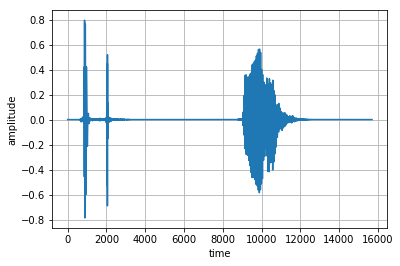

In [39]:
#data, sample_rate = sf.read('data/numbers/02_b4a02c3c00.wav' )
data, sample_rate = sf.read('data/numbers/00_6057878849.wav' )
print(min(abs(data)))
plt.figure()
plt.plot(data)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)

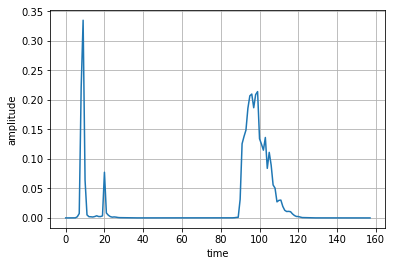

In [40]:
averages = []
frameSize = 100
for frame in range(0,len(data), frameSize):
    averages.append(np.average(np.absolute(data[frame:frame+frameSize])))
#print(averages)
#print(np.average(averages))
avg = np.average(averages)
plt.figure()
plt.plot(averages)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)

[(8, 11), (20, 21), (90, 114), (115, 116)]
(115, 116)
start idx: 9000 end idx: 11400


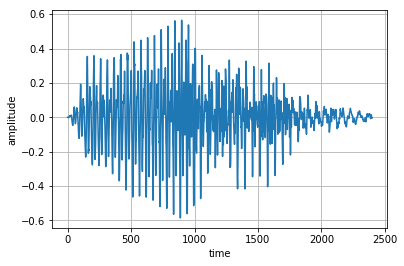

In [41]:
startIdx = None
endIdx = None
clusters = []
for idx, frame in enumerate(range(0,len(data), step)):
    if averages[idx] > avg/2 and not startIdx:
        startIdx = idx
    if startIdx and not endIdx:
        if averages[idx] < avg/2:
            endIdx = idx
    if startIdx and endIdx:
        clusters.append((startIdx,endIdx))
        startIdx = None
        endIdx = None
        
print(clusters) 
# find largest cluster
largest_cluster = 0
largest_cluster_size = 0
for cluster in clusters:
    cluster_size = cluster[1]-cluster[0]
    if cluster_size > largest_cluster_size:
        largest_cluster_size = cluster_size
        largest_cluster = cluster
        
clippedData = data[largest_cluster[0]*frameSize:largest_cluster[1]*frameSize]
        
    
print(cluster)
print('start idx:', largest_cluster[0]*frameSize, 'end idx:',largest_cluster[1]*frameSize)
#newData = data[startIdx*100:endIdx*100]
plt.figure()
plt.plot(clippedData)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)
#plays audio
#ipd.Audio(clippedData, rate=SAMPLE_RATE)
sf.write('output.wav', clippedData, SAMPLE_RATE, subtype='PCM_16')

(8164,)
[0.29718018 0.77803293 0.15939209 ... 0.00657533 0.0049441  0.00476074]


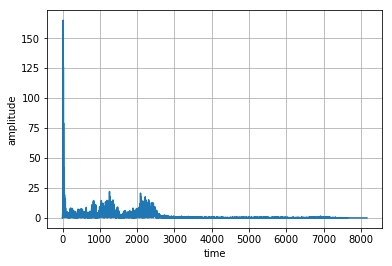

In [45]:
mags = abs(np.real(np.fft.rfft(data)))
print(mags.shape)
print(mags)
plt.figure()
plt.plot(mags)
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.yscale('log')
plt.grid(True)